Por Daniela Opitz. dopitz@udd.cl.

Actualizado: 13 de marzo de 2024.

# Bienvenida al Curso de Visualización de la Información

Bienvenidos al Taller de Visualización de la Información en la Universidad del Desarrollo. En este notebook, revisaremos los conceptos básicos de la biblioteca Pandas en Python, una herramienta esencial para la manipulación y análisis de datos. Aprenderemos a cargar, explorar y manipular datasets para prepararnos para visualizaciones más avanzadas.


In [1]:
import pandas as pd

# Pandas

* Pandas es un módulo de Python para realizar análisis de datos http://pandas.pydata.org/


* Esta presentación basada en el trabajo de Jake VanDerPlas https://github.com/jakevdp/PythonDataScienceHandbook. Bajo licencia CC0.

# 1.0 Data Frames

* Es una tabla (si, como las de Excel), compuesta por varias columnas. Las columnas también se llaman series.

In [57]:
city = pd.Series(['California','Texas','New York', 'Florida','Alabama'])
area = pd.Series([423967, 695662, 141297,170312, 149995])
pop  = pd.Series([38332521, 26448193, 19651127, 19552860, 12882135])

df   = pd.DataFrame({'city':city, 'area':area, 'pop':pop})
df

,city,area,pop
0,California,423967,38332521
1,Texas,695662,26448193
2,New York,141297,19651127
3,Florida,170312,19552860
4,Alabama,149995,12882135


* Las columnas se pueden seleccionar con el operador corchete.

In [58]:
df['area']

0    423967
1    695662
2    141297
3    170312
4    149995
Name: area, dtype: int64

* O así

In [59]:
df.area

0    423967
1    695662
2    141297
3    170312
4    149995
Name: area, dtype: int64

In [60]:
df[['area', 'pop']]

,area,pop
0,423967,38332521
1,695662,26448193
2,141297,19651127
3,170312,19552860
4,149995,12882135


* Y como cada columna es una Serie... podemos realizar operaciones de Series!

In [61]:
df['area'] / 1000

0    423.967
1    695.662
2    141.297
3    170.312
4    149.995
Name: area, dtype: float64

## Consultando datos en un Dataframe

In [62]:
df.head(6)

,city,area,pop
0,California,423967,38332521
1,Texas,695662,26448193
2,New York,141297,19651127
3,Florida,170312,19552860
4,Alabama,149995,12882135


In [63]:
df.tail()

,city,area,pop
0,California,423967,38332521
1,Texas,695662,26448193
2,New York,141297,19651127
3,Florida,170312,19552860
4,Alabama,149995,12882135


* Podemos usar el operador loc[] para recuperar una fila:

In [64]:
df.loc[2]

city    New York
area      141297
pop     19651127
Name: 2, dtype: object

## Manipulando columnas

* Agregar una columna:

In [65]:
# Puedes asignar nuevas columnas
df['density'] = df['pop'] / df['area']
df

,city,area,pop,density
0,California,423967,38332521,90.413926
1,Texas,695662,26448193,38.018740
2,New York,141297,19651127,139.076746
3,Florida,170312,19552860,114.806121
4,Alabama,149995,12882135,85.883763


* Y borrar columnas:

In [66]:
copy_data = df.drop(['area'], axis='columns')
copy_data

,city,pop,density
0,California,38332521,90.413926
1,Texas,26448193,38.018740
2,New York,19651127,139.076746
3,Florida,19552860,114.806121
4,Alabama,12882135,85.883763


Para seleccionar una fila de un data frame en Python, puedes usar el método iloc[] o loc[]:

df.iloc[i] selecciona la fila en la posición i (empezando desde 0).
df.loc[label] selecciona la fila con la etiqueta label.



In [12]:
df.iloc[0]

city       California
area           423967
pop          38332521
density     90.413926
Name: 0, dtype: object

In [13]:
df.loc[0]

city       California
area           423967
pop          38332521
density     90.413926
Name: 0, dtype: object

# Actividad 1:

Considerando el siguiente data frame:


- Visualizar el DataFrame: Impriman el DataFrame completo para ver su estructura.
- Seleccionar una columna: Seleccionen la columna 'Nombre' e imprima.
- Seleccionar múltiples columnas: Seleccione las columnas 'Nombre' y 'Ciudad' y e imprima.



In [67]:
data = {
    'Nombre': ['Ana', 'Luis', 'Carlos', 'María', 'Josefina', 'Andrés', 'Camila', 'Felipe', 'Daniela', 'Rodrigo'],
    'Edad': [25, 30, 22, 28, 35, 40, 19, 23, 29, 32],
    'Ciudad': ['Santiago', 'Valparaíso', 'Santiago', 'Concepción', 'Valdivia', 'Santiago', 'Temuco', 'La Serena', 'Santiago', 'Valparaíso'],
    'Profesión': ['Ingeniera', 'Médico', 'Abogado', 'Arquitecta', 'Psicóloga', 'Ingeniero', 'Estudiante', 'Profesor', 'Diseñadora', 'Ingeniero']
}

In [69]:
datos1=pd.DataFrame(data)

In [71]:
datos1.head()

,Nombre,Edad,Ciudad,Profesión
0,Ana,25,Santiago,Ingeniera
1,Luis,30,Valparaíso,Médico
2,Carlos,22,Santiago,Abogado
3,María,28,Concepción,Arquitecta
4,Josefina,35,Valdivia,Psicóloga


## Cargando y filtrando datos

* Pandas también puede abrir varios tipos de archivo, nosotros usaremos CSV.
* Más info sobre otro formatos (excel, json, xml...) https://pandas.pydata.org/pandas-docs/stable/io.html

In [16]:
try:
    import google.colab
    !curl -L -o 2020-05-11-CasosConfirmados.csv 'https://raw.githubusercontent.com/daniopitz/visualizacion/main/clases_practicas/data/2020-05-11-CasosConfirmados.csv'

except:
    pass

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14462  100 14462    0     0  63158      0 --:--:-- --:--:-- --:--:-- 63429


In [73]:
#Si está usando Google Colab
path_file='2020-05-11-CasosConfirmados.csv'

#Si no está usando Google Colab

#path_file='data/2020-05-11-CasosConfirmados.csv'

df = pd.read_csv(path_file)
df.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
0,Arica y Parinacota,15,Arica,15101,247552.0,353.0
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,188.0


In [74]:
df

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
0,Arica y Parinacota,15,Arica,15101,247552.0,353.0
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,188.0
...,...,...,...,...,...,...
341,Magallanes,12,Punta Arenas,12101,141984.0,858.0
342,Magallanes,12,Rio Verde,12103,211.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,1.0
344,Magallanes,12,Timaukel,12303,282.0,0.0


In [75]:
df.columns

Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion',
       'Casos Confirmados'],
      dtype='object')

* Se pueden recuperar filas que cumple condiciones sobre las columnas:
* Ejemplo: ¿Cuáles son las comunas con menos de 50 casos confirmados?

In [76]:
df[df['Casos Confirmados'] < 50] # comunas con menos de 50 confirmados

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0
5,Tarapacá,1,Camina,1402,1375.0,0.0
6,Tarapacá,1,Colchane,1403,1583.0,0.0
...,...,...,...,...,...,...
340,Magallanes,12,Primavera,12302,694.0,1.0
342,Magallanes,12,Rio Verde,12103,211.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,1.0
344,Magallanes,12,Timaukel,12303,282.0,0.0


In [77]:
menos_casos = df[df['Casos Confirmados'] < 5]
menos_casos

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0
5,Tarapacá,1,Camina,1402,1375.0,0.0
6,Tarapacá,1,Colchane,1403,1583.0,0.0
...,...,...,...,...,...,...
340,Magallanes,12,Primavera,12302,694.0,1.0
342,Magallanes,12,Rio Verde,12103,211.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,1.0
344,Magallanes,12,Timaukel,12303,282.0,0.0


Las condiciones se pueden mezclar con el operador or, and y not. Siempre debes **usar paréntesis para agrupar las condiciones!**

| Operación | Python (`if`) | Pandas |
|-----------|--------------|-----------|
| Disyunción | or | &#124; |
| Conjunción | and | & |
| Negación | not | ~ |

In [78]:
casos_extremos = df[(df['Casos Confirmados'] < 50) | (df['Casos Confirmados'] > 500)] # debes agrupar condiciones con paréntesis
casos_extremos

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0
5,Tarapacá,1,Camina,1402,1375.0,0.0
6,Tarapacá,1,Colchane,1403,1583.0,0.0
...,...,...,...,...,...,...
341,Magallanes,12,Punta Arenas,12101,141984.0,858.0
342,Magallanes,12,Rio Verde,12103,211.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,1.0
344,Magallanes,12,Timaukel,12303,282.0,0.0


¿Y cuales están entre 50 y 500?

In [79]:
casos_noextremos = df[(df['Casos Confirmados'] > 50) & (df['Casos Confirmados'] < 500)]
casos_noextremos.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
0,Arica y Parinacota,15,Arica,15101,247552.0,353.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,188.0
8,Tarapacá,1,Iquique,1101,223463.0,308.0
12,Antofagasta,2,Calama,2201,190336.0,114.0
14,Antofagasta,2,Mejillones,2102,14776.0,150.0


* Pregunta: ¿Cuántas comunas están en los extremos?

In [80]:
casos_noextremos.shape # (num. filas, num. columnas)

(62, 6)

## Operaciones sobre Dataframes
Pandas incorpora operaciones estadísticas básicas. Ver vás en https://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics

In [81]:
df.describe()

,Codigo region,Codigo comuna,Poblacion,Casos Confirmados
count,346.000000,346.000000,346.000000,346.000000
mean,8.797688,9034.997110,56237.890173,86.777457
std,3.847016,3818.147431,88945.967089,220.231669
min,1.000000,1101.000000,137.000000,0.000000
25%,6.000000,6109.250000,9649.250000,2.000000
50%,8.000000,8313.500000,19770.000000,8.000000
75%,13.000000,13102.750000,55441.250000,40.750000
max,16.000000,16305.000000,645909.000000,1873.000000


In [82]:
df_met=df[df['Region'] == "Metropolitana"]
df_met

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
82,Metropolitana,13,Alhue,13502,7405.0,0.0
83,Metropolitana,13,Buin,13402,109641.0,152.0
84,Metropolitana,13,Calera de Tango,13403,28525.0,23.0
85,Metropolitana,13,Cerrillos,13102,88956.0,329.0
86,Metropolitana,13,Cerro Navia,13103,142465.0,387.0
87,Metropolitana,13,Colina,13301,180353.0,289.0
88,Metropolitana,13,Conchali,13104,139195.0,470.0
89,Metropolitana,13,Curacavi,13503,36430.0,35.0
90,Metropolitana,13,El Bosque,13105,172000.0,439.0
91,Metropolitana,13,El Monte,13602,40014.0,29.0


### Ordenar

In [83]:
df_sorted = df_met.sort_values('Casos Confirmados',ascending=False)
#df_sorted
df_sorted.head(5)

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Casos Confirmados
130,Metropolitana,13,Santiago,13101,503147.0,1873.0
119,Metropolitana,13,Puente Alto,13201,645909.0,1658.0
97,Metropolitana,13,La Florida,13110,402433.0,1071.0
122,Metropolitana,13,Recoleta,13127,190075.0,1028.0
94,Metropolitana,13,Independencia,13108,142065.0,992.0


### Contar

¿Cuántas comunas hay por Region

In [84]:
df['Region'].value_counts() #retorna el numero de filas (comunas) por 'Region'

Metropolitana         52
Valparaíso            38
O’Higgins             33
Biobío                33
Araucanía             32
Maule                 30
Los Lagos             30
Ñuble                 21
Coquimbo              15
Los Ríos              12
Magallanes            11
Aysén                 10
Antofagasta            9
Atacama                9
Tarapacá               7
Arica y Parinacota     4
Name: Region, dtype: int64

### Visualizar datos

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
comunas_count = df['Region'].value_counts()

comunas_count.head()

Metropolitana    52
Valparaíso       38
O’Higgins        33
Biobío           33
Araucanía        32
Name: Region, dtype: int64

In [87]:
comunas_count

Metropolitana         52
Valparaíso            38
O’Higgins             33
Biobío                33
Araucanía             32
Maule                 30
Los Lagos             30
Ñuble                 21
Coquimbo              15
Los Ríos              12
Magallanes            11
Aysén                 10
Antofagasta            9
Atacama                9
Tarapacá               7
Arica y Parinacota     4
Name: Region, dtype: int64

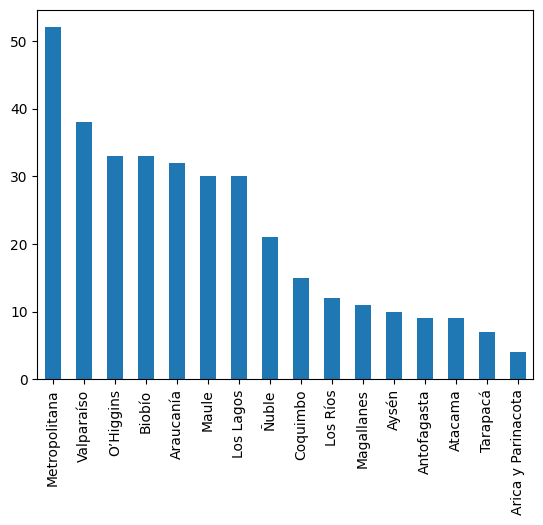

In [88]:
comunas_count.plot(kind='bar');

### Agrupar

In [33]:
df[['Region', 'Casos Confirmados']]

,Region,Casos Confirmados
0,Arica y Parinacota,353.0
1,Arica y Parinacota,0.0
2,Arica y Parinacota,0.0
3,Arica y Parinacota,0.0
4,Tarapacá,188.0
...,...,...
341,Magallanes,858.0
342,Magallanes,0.0
343,Magallanes,1.0
344,Magallanes,0.0


In [34]:
df[['Region', 'Casos Confirmados']].groupby('Region').sum()

,Casos Confirmados
Region,
Antofagasta,1001.0
Araucanía,1462.0
Arica y Parinacota,353.0
Atacama,135.0
Aysén,5.0
Biobío,930.0
Coquimbo,149.0
Los Lagos,569.0
Los Ríos,207.0


In [35]:
df_sum=df[['Region', 'Casos Confirmados']].groupby('Region').sum()
df_sum

,Casos Confirmados
Region,
Antofagasta,1001.0
Araucanía,1462.0
Arica y Parinacota,353.0
Atacama,135.0
Aysén,5.0
Biobío,930.0
Coquimbo,149.0
Los Lagos,569.0
Los Ríos,207.0


<Axes: xlabel='Region'>

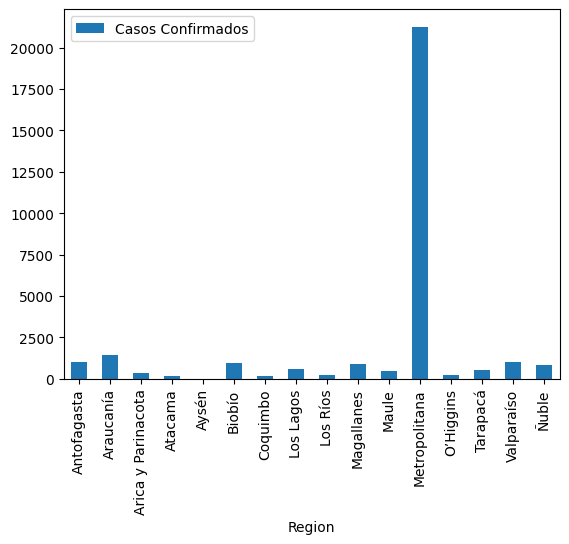

In [36]:
df_sum.plot(kind='bar')

## Actividad 2


* Ordenar el DataFrame: Ordena el DataFrame por la columna
'Edad' de forma ascendente y luego de forma descendente.
* Agrupar datos: Agrupa el DataFrame por la columna 'Ciudad' y calcula la edad promedio para cada ciudad.
* Filtrar y seleccionar: Filtra el DataFrame para mostrar solo las filas de las personas que son 'Ingeniero' o 'Ingeniera' y selecciona solo las columnas 'Nombre' y 'Edad'.
* Crear una columna condicional: Crea una nueva columna llamada 'Grupo Etario' que contenga los valores 'Joven' si la persona tiene menos de 30 años, 'Adulto' si tiene entre 30 y 40 años, y 'Senior' si tiene más de 40 años.




In [37]:
data = {
    'Nombre': ['Ana', 'Luis', 'Carlos', 'María', 'Josefina', 'Andrés', 'Camila', 'Felipe', 'Daniela', 'Rodrigo'],
    'Edad': [25, 30, 22, 28, 35, 40, 19, 23, 29, 52],
    'Ciudad': ['Santiago', 'Valparaíso', 'Santiago', 'Concepción', 'Valdivia', 'Santiago', 'Temuco', 'La Serena', 'Santiago', 'Valparaíso'],
    'Profesión': ['Ingeniera', 'Médico', 'Abogado', 'Arquitecta', 'Psicóloga', 'Ingeniero', 'Estudiante', 'Profesor', 'Diseñadora', 'Ingeniero']
}

In [38]:
datos2=pd.DataFrame(data)
datos2

,Nombre,Edad,Ciudad,Profesión
0,Ana,25,Santiago,Ingeniera
1,Luis,30,Valparaíso,Médico
2,Carlos,22,Santiago,Abogado
3,María,28,Concepción,Arquitecta
4,Josefina,35,Valdivia,Psicóloga
5,Andrés,40,Santiago,Ingeniero
6,Camila,19,Temuco,Estudiante
7,Felipe,23,La Serena,Profesor
8,Daniela,29,Santiago,Diseñadora
9,Rodrigo,52,Valparaíso,Ingeniero


In [39]:
datos2

,Nombre,Edad,Ciudad,Profesión
0,Ana,25,Santiago,Ingeniera
1,Luis,30,Valparaíso,Médico
2,Carlos,22,Santiago,Abogado
3,María,28,Concepción,Arquitecta
4,Josefina,35,Valdivia,Psicóloga
5,Andrés,40,Santiago,Ingeniero
6,Camila,19,Temuco,Estudiante
7,Felipe,23,La Serena,Profesor
8,Daniela,29,Santiago,Diseñadora
9,Rodrigo,52,Valparaíso,Ingeniero


# 2.0 Extra
## Series

* Una serie es una colección de valores.

In [40]:
pd.Series(['Santiago', 'Concepción', 'Valparaíso'])

0      Santiago
1    Concepción
2    Valparaíso
dtype: object

* Están compuestos por un índice y valores

In [41]:
s = pd.Series([0.25, 0.5, 0.75, 1.0])
s

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [42]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [43]:
s.values

array([0.25, 0.5 , 0.75, 1.  ])

## Operaciones sobre Series

* Operaciones aritméticas a cada elemento de la serie (como un vector de matlab)
    * Suma, resta, división, etc...
    * Más info en https://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [44]:
s + 50 # suma 50 a cada valor de la serie

0    50.25
1    50.50
2    50.75
3    51.00
dtype: float64

In [45]:
s * 3.1416

0    0.7854
1    1.5708
2    2.3562
3    3.1416
dtype: float64

* También podemos realizar operaciones entre dos series (deben ser del mismo tamaño)

In [46]:
h = pd.Series([-100, -99, -98, -97])
h

0   -100
1    -99
2    -98
3    -97
dtype: int64

In [47]:
s + h

0   -99.75
1   -98.50
2   -97.25
3   -96.00
dtype: float64

* Y también se pueden realizar operaciones sobre todos los valores

In [48]:
s.sum()

2.5

In [49]:
s.mean()

0.625

In [50]:
s.std()

0.3227486121839514

## Consultando series

* Podemos recuperar elementos de la serie indicando su posición (recuperar el i-ésimo elemento)

In [51]:
s = pd.Series([0.25, 0.5, 0.75, 1.0])

In [52]:
s.loc[2] #recupera el segundo elemento de s

0.75

In [53]:
s.loc[2:3] # recupera un rango de elementos

2    0.75
3    1.00
dtype: float64

* Y también podemos seleccionar por alguna condición sobre los valores

In [54]:
s[s > 0.4] # puede usar cualquier operador de comparación

1    0.50
2    0.75
3    1.00
dtype: float64

* El operador de comparación devuelve una serie de True/False
    * Todas las posiciones que son True se seleccionan

In [55]:
s > 0.4

0    False
1     True
2     True
3     True
dtype: bool